example
0
hub -> repeat
1
repeat -> end1
2
end1 -> repeat
3
repeat -> end2 packet loss
4
repeat -> end2
5
end2 -> repeat
6
repeat -> hub
7

repeat 0~7
end1 1~3
end2 3~6

In [1]:
# this is the method 1 meaning query-based one
import random
ontimes_child = []
ontimes_repeat = []
success_rate_array = []
# endとrepeatの通信は最小でsend_delay、最大でtimeout
child_num = 10
simulation_num = 100
time_span = 600
max_retry = 5
# retry_p = 0.01
retry_sum = 0
send_delay = 1
send_timeout_delay = 3
# time_error_wait_time = 1
for retry_p in [num * 0.01 for num in range(0, 101)]:
    time = 0
    success_rate = 0

    alive = [True]*child_num
    ontime = [0]*(child_num+1)
    wakeup_time = [0]*(child_num+1)
    for i in range(1,child_num+1):
        # wakeup_time[i] = send_delay*2*i-time_error_wait_time 
        # wakes up at this time on their clock, but in reality it's send_delay*2*i
        # because the time is delayed due to sending delay
        wakeup_time[i] = send_delay*2*i - send_delay


    for _ in range(simulation_num):

        time = round(time+1,2)

        for child_id in range(child_num):
            if alive[child_id]:
                # repeat->end
                retry_num = 0
                # get retry count
                for i in range(max_retry):
                    if random.random()>retry_p:
                        break
                    else:
                        retry_num += 1
                
                # add time
                retry_sum += retry_num
                time = round(time+send_delay*(1+retry_num),2)
            
                if retry_num == max_retry and random.random()<=retry_p:
                    # communication failed
                    pass
                else:
                    # end->repeat
                    retry_num = 0
                    # get retry count
                    for i in range(max_retry):
                        if random.random()>retry_p:
                            break
                        else:
                            retry_num += 1

                    # add time
                    retry_sum += retry_num 
                    time = round(time+send_delay*(1+retry_num),2)
                    if retry_num == max_retry and random.random()<=retry_p:
                        pass
                    else:
                        success_rate += 1
                # add ontime the time on
                ontime[child_id+1] += (time%time_span-wakeup_time[child_id+1])
                # print(time,wakeup_time[child_id+1])
                if time%time_span-wakeup_time[child_id+1] <=0:
                    print("warning")

            else:
                # timeout
                time = round(time+send_timeout_delay,2)

        ontime[0] += (time%time_span-wakeup_time[0])+1 #+1 is for repeat->hub

        time = round(time+(time_span-time%time_span),2)


    for i in range(len(ontime)):
        ontime[i] /= simulation_num

    ontimes_child.append(sum(ontime[1:])/child_num)
    ontimes_repeat.append(ontime[0])
    success_rate_array.append(success_rate/(simulation_num*child_num))
print(ontimes_child)

ontimes_repeat_request = ontimes_repeat
ontimes_child_request = ontimes_child
success_rate_array_request = success_rate_array

[2.0, 2.1350000000000002, 2.268, 2.341, 2.434, 2.696, 2.7189999999999994, 2.8340000000000005, 2.8340000000000005, 2.9850000000000003, 3.017, 3.354, 3.6189999999999998, 3.4879999999999995, 4.045999999999999, 4.093999999999999, 3.9979999999999998, 4.2059999999999995, 4.284000000000001, 4.453, 4.9030000000000005, 4.797, 5.052, 5.117, 5.428, 5.607, 5.918, 5.841000000000001, 6.337000000000001, 6.379, 6.362, 6.779000000000001, 7.519, 7.267999999999999, 7.882000000000001, 7.758000000000001, 8.278, 8.824, 8.862, 8.677, 8.891, 9.524000000000001, 10.068999999999999, 9.952000000000002, 10.674999999999999, 11.217, 10.895, 11.550999999999998, 11.553999999999998, 12.568999999999999, 11.793000000000001, 12.828000000000003, 12.828999999999999, 13.052000000000001, 13.432999999999998, 14.963999999999999, 14.455000000000002, 15.027000000000001, 15.303999999999998, 15.699000000000002, 16.457, 16.699, 17.049, 18.166, 18.648000000000003, 20.240000000000002, 20.151000000000003, 19.307000000000002, 20.64, 21.

child_num: 10
simulation_num: 100
time_span: 600
send_delay: 1
time_span: 600
repeat on time


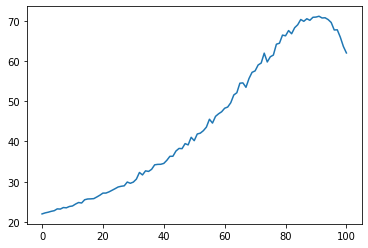

child average on time


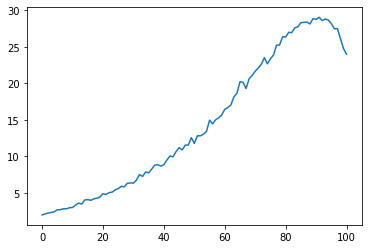

success rate for repeat <-> child


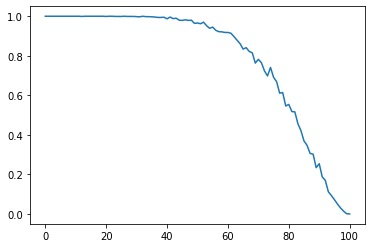

In [2]:
import matplotlib.pyplot as plt
print("child_num: "+str(child_num))
print("simulation_num: "+str(simulation_num))
print("time_span: "+str(time_span))
print("send_delay: "+str(send_delay))
print("time_span: "+str(time_span))

print("repeat on time")
plt.plot(ontimes_repeat)
plt.show()
print("child average on time")
plt.plot(ontimes_child)
plt.show()
print("success rate for repeat <-> child")
plt.plot(success_rate_array)
plt.show()


example

0
hub -> repeat
1
repeat -> all end
2
end1 -> repeat
3
(end1 -> repeat)
4
(end1 -> repeat)
5
end2 -> repeat
6
end2 -> repeat
7
(end2 -> repeat)
8
repeat -> hub
9

repeat 0~9
end1 1~3
end2 1, 3~6

In [3]:
import random
ontimes_child = []
ontimes_repeat = []
success_rate_array = []
# endとrepeatの通信は最小でsend_delay、最大でtimeout
child_num = 10
simulation_num = 1000
time_span = 600
max_retry = 5
# retry_p = 0.01
retry_sum = 0
send_delay = 1
send_timeout_delay = 3
# time_error_wait_time = 1
for retry_p in [num * 0.01 for num in range(0, 101)]: # 0,101
    time = 0
    success_rate = 0

    alive = [True]*child_num
    ontime = [0]*(child_num+1)
    wakeup_time = [0]*(child_num+1)
    for i in range(1,child_num+1):
        # wakeup_time[i] = send_delay*2*i-time_error_wait_time 
        # wakes up at this time on their clock, but in reality it's send_delay*2*i
        # because the time is delayed due to sending delay
        wakeup_time[i] = send_delay*2 + send_delay*(1+max_retry)*(i-1)

    for _ in range(simulation_num):

        time = round(time+send_delay*2,2)

        for child_id in range(child_num):
            if alive[child_id]:
                # end->repeat
                retry_num = 0
                # get retry count
                for i in range(max_retry):
                    if random.random()>retry_p:
                        break
                    else:
                        retry_num += 1
                
                # add time
                retry_sum += retry_num
                time = round(time+send_delay*(1+retry_num),2)
            
                if retry_num == max_retry and random.random()<=retry_p:
                    # communication failed
                    pass
                else:
                    success_rate += 1

                # add ontime the time on
                ontime[child_id+1] += (time%time_span-wakeup_time[child_id+1]) + send_delay # add the time to receive now time
                # print(time,wakeup_time[child_id+1])
                if time%time_span-wakeup_time[child_id+1] <=0:
                    print("warning")
                
                time = round(time+send_delay*(max_retry-retry_num),2)

            else:
                # timeout
                time = round(time+send_timeout_delay,2)

        ontime[0] += (time%time_span-wakeup_time[0])+1 #+1 is for repeat->hub

        time = round(time+(time_span-time%time_span),2)


    for i in range(len(ontime)):
        ontime[i] /= simulation_num
    ontimes_child.append(sum(ontime[1:])/child_num)
    ontimes_repeat.append(ontime[0])
    success_rate_array.append(success_rate/(simulation_num*child_num))
print(ontimes_child)

ontimes_repeat_timeslot = ontimes_repeat
ontimes_child_timeslot = ontimes_child
success_rate_array_timeslot = success_rate_array


[2.0, 2.01, 2.022, 2.0303999999999993, 2.0392, 2.0510999999999995, 2.0605, 2.073, 2.0875, 2.1018999999999997, 2.1102, 2.1290000000000004, 2.1313, 2.153, 2.1683, 2.1776, 2.1871, 2.2005000000000003, 2.2239, 2.2349, 2.2578, 2.2638, 2.2793, 2.2953, 2.3211000000000004, 2.3293, 2.3575, 2.3632999999999997, 2.3822, 2.4056, 2.4245999999999994, 2.4493, 2.4544, 2.4925999999999995, 2.5113, 2.5332, 2.5634, 2.58, 2.6103, 2.6353000000000004, 2.6661, 2.658, 2.7244, 2.758, 2.7952, 2.7981, 2.8396, 2.8603, 2.8937, 2.9288, 2.9694000000000007, 3.0023, 3.0394999999999994, 3.0820000000000003, 3.1177, 3.1616, 3.1841, 3.2537999999999996, 3.2752000000000003, 3.3222, 3.3814, 3.4411, 3.4857000000000005, 3.5454, 3.5835999999999997, 3.6174999999999997, 3.6679000000000004, 3.7329999999999997, 3.8071000000000006, 3.877, 3.9345999999999997, 4.027800000000001, 4.0724, 4.1265, 4.2114, 4.2909, 4.373900000000001, 4.4216999999999995, 4.5665, 4.6015, 4.690499999999999, 4.7902000000000005, 4.8479, 4.9442, 5.0645, 5.130000000

child_num: 10
simulation_num: 1000
time_span: 600
send_delay: 1
time_span: 600
repeat on time


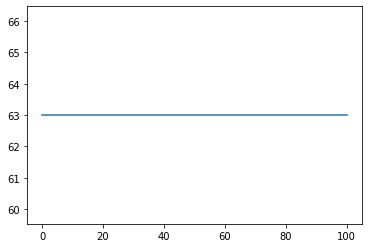

child average on time


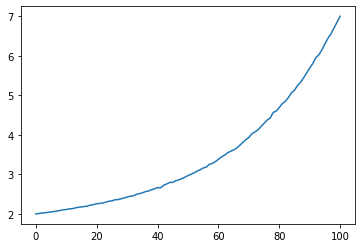

success rate for repeat <-> child


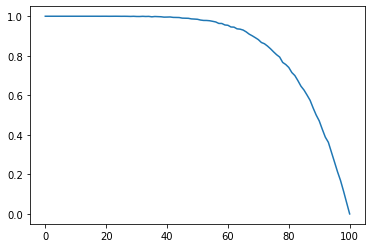

In [4]:
import matplotlib.pyplot as plt
print("child_num: "+str(child_num))
print("simulation_num: "+str(simulation_num))
print("time_span: "+str(time_span))
print("send_delay: "+str(send_delay))
print("time_span: "+str(time_span))

print("repeat on time")
plt.plot(ontimes_repeat)
plt.show()
print("child average on time")
plt.plot(ontimes_child)
plt.show()
print("success rate for repeat <-> child")
plt.plot(success_rate_array)
plt.show()

# fig = plt.figure(figsize = (10,20))

# ax1 = fig.add_subplot(3, 1, 1)
# ax2 = fig.add_subplot(3, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# ax1.plot(ontimes_repeat)
# ax2.plot(ontimes_child)
# ax3.plot(success_rate_array)

# ax1.set_title("repeat on-time")
# ax2.set_title("end average on-time")
# ax3.set_title("success rate for repeat <-> end")

# ax1.set_xlabel("retry probability")
# ax2.set_xlabel("retry probability")
# ax3.set_xlabel("retry probability")

# ax1.set_ylabel("(s)")
# ax2.set_ylabel("(s)")

# plt.show()

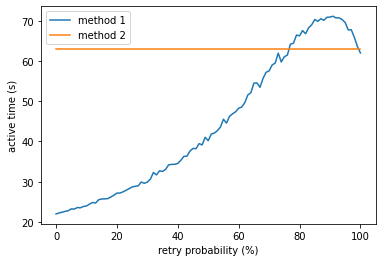

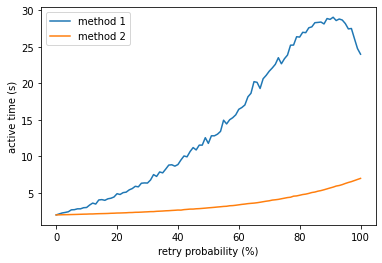

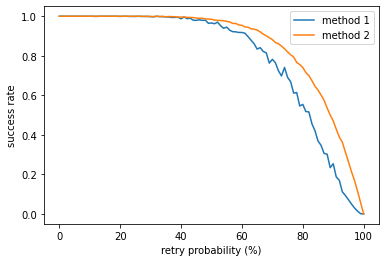

In [5]:
plt.figure(facecolor="white")
plt.plot(ontimes_repeat_request, label="method 1")
plt.plot(ontimes_repeat_timeslot, label="method 2")
plt.legend()
# plt.title("repeat on-time")
plt.xlabel("retry probability (%)")
plt.ylabel("active time (s)")
plt.show()

plt.figure(facecolor="white")
plt.plot(ontimes_child_request, label="method 1")
plt.plot(ontimes_child_timeslot, label="method 2")
plt.legend()
# plt.title("end average on-time")
plt.xlabel("retry probability (%)")
plt.ylabel("active time (s)")
plt.show()

plt.figure(facecolor="white")
plt.plot(success_rate_array_request, label="method 1")
plt.plot(success_rate_array_timeslot, label="method 2")
plt.legend()
# plt.title("success rate for repeat <-> end")
plt.xlabel("retry probability (%)")
plt.ylabel("success rate")
plt.show()

In [6]:
print(success_rate_array_request[50])
print(success_rate_array_timeslot[50])

0.966
0.9846
